<a href="https://colab.research.google.com/github/Avirup96/Projects/blob/main/Copy_of_TXTA_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The given dataset contains records of different banks both Govt and Private operating since 2014. The purpose of work on this data set to capture different insights that how these banks are operating through its different product services, growth and study on the customer reviews for their services across varios categories like Credit Card, Loan, Savings Account etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [ ]:
df = pd.read_csv("/content/A21--8.csv")
df_main = df.copy()
df.head(10)

,Title,Heading,Reviewer,Date,Review,Bank,Rating
0,Credit Card,Good service,SC,16-07-2019,I am holding an HDFC credit card. I have been ...,HDFC-Bank,4.0
1,Credit Card,Good,AR,16-07-2019,I am holding HDFC bank titanium credit card ...,HDFC-Bank,4.0
2,Credit Card,Good card,SRIDHAR,16-07-2019,I have been using HDFC credit card for long ti...,HDFC-Bank,4.0
3,Personal Loan,Excellent service,U,16-07-2019,I have been holding my personal loan from HDFC...,HDFC-Bank,5.0
4,Saving Account,Excellent service,Q,16-07-2019,I am holding a salary account in HDFC bank for...,HDFC-Bank,5.0
5,Credit Card,Excellent card,J,16-07-2019,I have been holding HDFC bank credit card from...,HDFC-Bank,5.0
6,Credit Card,HDFC is better compared to others,SHIAMKUMAR,16-07-2019,HDFC bank credit card has given option to con...,HDFC-Bank,4.0
7,Saving Account,Excellent,KAS,16-07-2019,I am holding a salary account in HDFC bank fo...,HDFC-Bank,5.0
8,Personal Loan,Excellent,PA,16-07-2019,I have taken a personal loan in HDFC bank for ...,HDFC-Bank,5.0
9,Credit Card,Credit limit should be increased,SU,16-07-2019,Past six years I am using HDFC money back cred...,HDFC-Bank,4.0


In [ ]:
df.nunique()

Title         17
Heading     1355
Reviewer    3662
Date         924
Review      4865
Bank           5
Rating        10
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     5000 non-null   object 
 1   Heading   5000 non-null   object 
 2   Reviewer  4996 non-null   object 
 3   Date      5000 non-null   object 
 4   Review    5000 non-null   object 
 5   Bank      5000 non-null   object 
 6   Rating    5000 non-null   float64
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


### The Reviewer Column is not considered for the present analysis hence will be droped

In [ ]:
df.drop("Reviewer", axis = 1, inplace = True)
df.head()

,Title,Heading,Date,Review,Bank,Rating
0,Credit Card,Good service,16-07-2019,I am holding an HDFC credit card. I have been ...,HDFC-Bank,4.0
1,Credit Card,Good,16-07-2019,I am holding HDFC bank titanium credit card ...,HDFC-Bank,4.0
2,Credit Card,Good card,16-07-2019,I have been using HDFC credit card for long ti...,HDFC-Bank,4.0
3,Personal Loan,Excellent service,16-07-2019,I have been holding my personal loan from HDFC...,HDFC-Bank,5.0
4,Saving Account,Excellent service,16-07-2019,I am holding a salary account in HDFC bank for...,HDFC-Bank,5.0


### From the Date Column, we will extract only the year for the ease of analysis

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [ ]:
df.head()

,Title,Heading,Date,Review,Bank,Rating,Year
0,Credit Card,Good service,16-07-2019,I am holding an HDFC credit card. I have been ...,HDFC-Bank,4.0,2019
1,Credit Card,Good,16-07-2019,I am holding HDFC bank titanium credit card ...,HDFC-Bank,4.0,2019
2,Credit Card,Good card,16-07-2019,I have been using HDFC credit card for long ti...,HDFC-Bank,4.0,2019
3,Personal Loan,Excellent service,16-07-2019,I have been holding my personal loan from HDFC...,HDFC-Bank,5.0,2019
4,Saving Account,Excellent service,16-07-2019,I am holding a salary account in HDFC bank for...,HDFC-Bank,5.0,2019


In [ ]:
df["Bank"].unique()

array(['HDFC-Bank', 'Capital-First', 'Andhra-Bank', 'State-Bank-Of-India',
       'Indian-Bank'], dtype=object)

In [ ]:
df["Year"].unique()

array([2019, 2018, 2017, 2016, 2015, 2014])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Year,No of Customers
0,2014,14
1,2015,300
2,2016,205
3,2017,863
4,2018,921
5,2019,2697


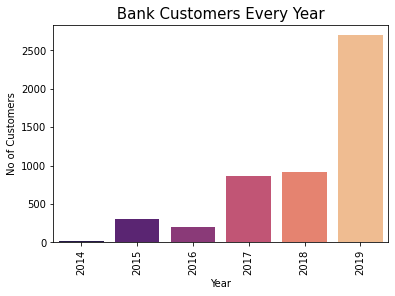

In [ ]:
df_grow = df.groupby(["Year"])[["Year"]].count()
df_grow = df_grow.rename(columns={df_grow.columns[0]: "No of Customers"})
df_grow = df_grow.reset_index()
plt.figure(figsize=(6,4))
plt.xticks(rotation = 90)
g = sns.barplot("Year", "No of Customers", data = df_grow, palette = "magma")
g.set_title(" Bank Customers Every Year ", fontsize = 15)
df_grow

The no of customers have grown by almost 192 times and the maximum growth is observed in 2019 almost 200% from previous year.

In [ ]:
def by_year(x):
    df_year = df[df["Year"] == x]
    val = df_year["Bank"].value_counts()
    lab = df_year["Bank"].value_counts().index
    plt.figure(figsize = (8,6))
    plt.pie(val, labels = lab, autopct = '%1.1f%%', startangle = 0)
    plt.title(" Distribution of Bank ", size = 15)

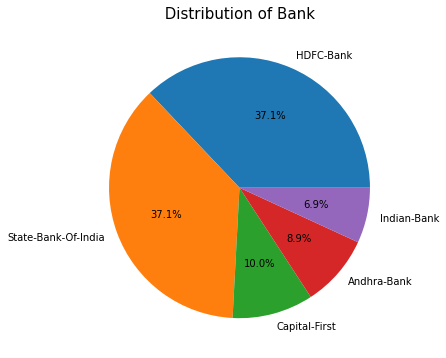

In [ ]:
by_year(2019)

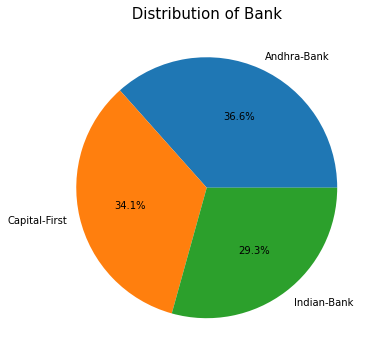

In [ ]:
by_year(2018)

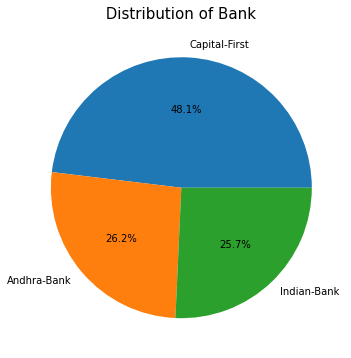

In [ ]:
by_year(2017)

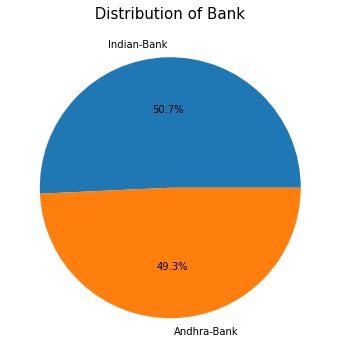

In [ ]:
by_year(2016)

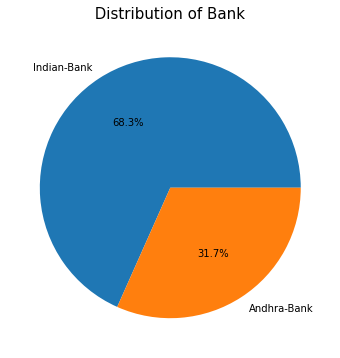

In [ ]:
by_year(2015)

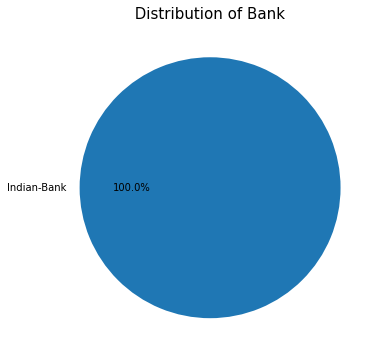

In [ ]:
by_year(2014)

### Observation:
 1. In 2014, Indian Bank was the sole service provider of various banking services.
 2. By 2019, other banks came in market and its market capture reduced to 6.9%
 3. When Capital-First (the first private bank) entered the market in 2017, it had the largest market share of 48.1% , but now  it has reduced to just 10%.
 4. At present the major banking service providers are State Bank Of India(Govt) and HDFC Bank (Private) having equal market capture.
 5. As of 2019, Govt Banks(State Bank of India, Andhra Bank and Indian Bank) has higher market capture than Private Banks(HDFC and Capital First)

## Questions need to be answered:
1. Why HDFC and SBI have a majority market share since its inception in 2019 ?
2. Why Indian Bank has lost its market share ?

### Lets try to find answers for question 1
#### Let's analyze the product offerings of HDFC Bank

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_hdfc = df[df["Bank"]=="HDFC-Bank"]
df_hdfc.head()

,Title,Heading,Date,Review,Bank,Rating,Year
0,Credit Card,Good service,16-07-2019,I am holding an HDFC credit card. I have been ...,HDFC-Bank,4.0,2019
1,Credit Card,Good,16-07-2019,I am holding HDFC bank titanium credit card ...,HDFC-Bank,4.0,2019
2,Credit Card,Good card,16-07-2019,I have been using HDFC credit card for long ti...,HDFC-Bank,4.0,2019
3,Personal Loan,Excellent service,16-07-2019,I have been holding my personal loan from HDFC...,HDFC-Bank,5.0,2019
4,Saving Account,Excellent service,16-07-2019,I am holding a salary account in HDFC bank for...,HDFC-Bank,5.0,2019


In [ ]:
df_hdfc["Title"].unique()

array(['Credit Card', 'Personal Loan', 'Saving Account', 'Other Loan',
       'All Products', 'Car Loan', 'Two Wheeler Loan', 'Gold Loan',
       'Consumer Durable Loan', 'Current Account',
       'Business Loan General', 'Recurring Deposit', 'Fixed Deposit',
       'Mutual Fund'], dtype=object)

In [ ]:
y_val = df_hdfc["Title"].value_counts().index
x_val = df_hdfc["Title"].value_counts()
x_grph = []
y_grph = []
for i in range(len(x_val)):
    x_grph.append(x_val[i])
    y_grph.append(y_val[i])

Text(0.5, 1.0, ' Product Offerings of HDFC Bank')

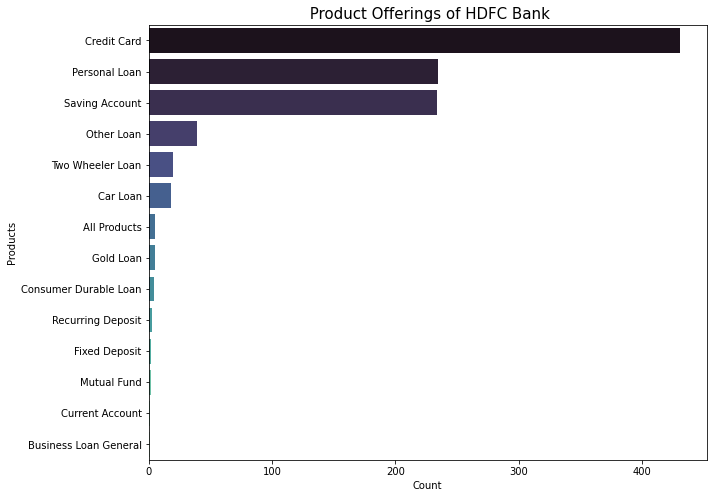

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel("Count")
plt.ylabel("Products")
graph = sns.barplot(x = x_grph, y = y_grph, palette = "mako")
graph.set_title(" Product Offerings of HDFC Bank", fontsize = 15)

We can see for HDFC, the major product offering is Credit Cards that accounts 43.1% followed by Personal Loan and Savings account.
Now let us check whether HDFC bank is the major player in Credit Card or there are other banks as well.

In [ ]:
df_credit = df[(df["Title"]=="Credit Card") & (df["Year"] == 2019)]
df_credit.tail()

,Title,Heading,Date,Review,Bank,Rating,Year
4120,Credit Card,Good card,30-03-2019,I have my credit card approved with INDIAN B...,Indian-Bank,5.0,2019
4126,Credit Card,Excellent Service,26-03-2019,It has been more than five years since i am us...,Indian-Bank,5.0,2019
4129,Credit Card,Excellent card,17-03-2019,I have been holding INDIAN bank credit card fo...,Indian-Bank,5.0,2019
4167,Credit Card,Best card to use,28-01-2019,I am using Indian Bank credit card from last 2...,Indian-Bank,5.0,2019
4175,Credit Card,Good service,23-01-2019,I was using this card for almost two years and...,Indian-Bank,4.0,2019


In [ ]:
y_val = df_credit["Bank"].value_counts().index
x_val = df_credit["Bank"].value_counts()
x_grph = []
y_grph = []
for i in range(len(x_val)):
    x_grph.append(x_val[i])
    y_grph.append(y_val[i])

Text(0.5, 1.0, ' Different Banks Offering Credit Card in 2019')

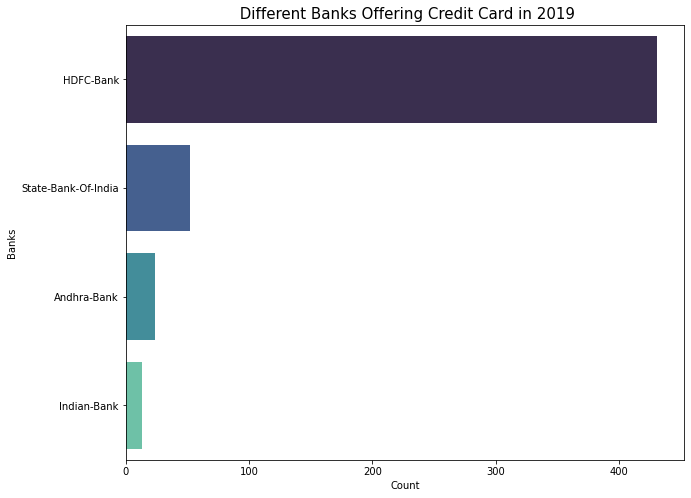

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel("Count")
plt.ylabel("Banks")
graph = sns.barplot(x = x_grph, y = y_grph, palette = "mako")
graph.set_title(" Different Banks Offering Credit Card in 2019", fontsize = 15)

Here it is clearly visible that HDFC is a major player in Credit Card Segment almost having 70% market share. Now we have to find out the reason why it is so .

In [ ]:
rat = df_credit.groupby("Bank")[["Rating"]].mean().sort_values(by = "Rating", ascending = False)
rat

,Rating
Bank,
Indian-Bank,4.538462
HDFC-Bank,4.255220
State-Bank-Of-India,4.240385
Andhra-Bank,4.166667


Though Indian Bank has the least no of Credit CaRD Offerings yet it has the highest ratings may be because of its offering to only niche customers who have been loyal since 2014. Lets check some of its reviews.

In [ ]:
df_ind = df_credit[df_credit["Bank"]=="Indian-Bank"]
df_ind["Heading"]

4001         Good Service
4020         Good Service
4039            Good card
4040            Good card
4089            Best Card
4095         Average card
4109            Good card
4111            Best card
4120            Good card
4126    Excellent Service
4129       Excellent card
4167     Best card to use
4175         Good service
Name: Heading, dtype: object

#### Let's analyze the product offerings of SBI Bank

In [ ]:
df_sbi = df[df["Bank"]=="State-Bank-Of-India"]
df_sbi.head()

,Title,Heading,Date,Review,Bank,Rating,Year
3000,Saving Account,Good,13-07-2019,I am holding a savings account in STATE BANK ...,State-Bank-Of-India,4.0,2019
3001,Saving Account,Excellent,13-07-2019,I have saving account with State Bank of India...,State-Bank-Of-India,5.0,2019
3002,Credit Card,Excellent,13-07-2019,I have a State Bank of India credit card. They...,State-Bank-Of-India,4.5,2019
3003,Saving Account,GOOD,13-07-2019,It is a savings account where there is a minim...,State-Bank-Of-India,5.0,2019
3004,Other Loan,Not to take loan against credit card,13-07-2019,I took my Jumbo loan from my SBI credit card. ...,State-Bank-Of-India,3.0,2019


In [ ]:
y_val = df_sbi["Title"].value_counts().index
x_val = df_sbi["Title"].value_counts()
x_grph = []
y_grph = []
for i in range(len(x_val)):
    x_grph.append(x_val[i])
    y_grph.append(y_val[i])

Text(0.5, 1.0, ' Product Offerings of SBI')

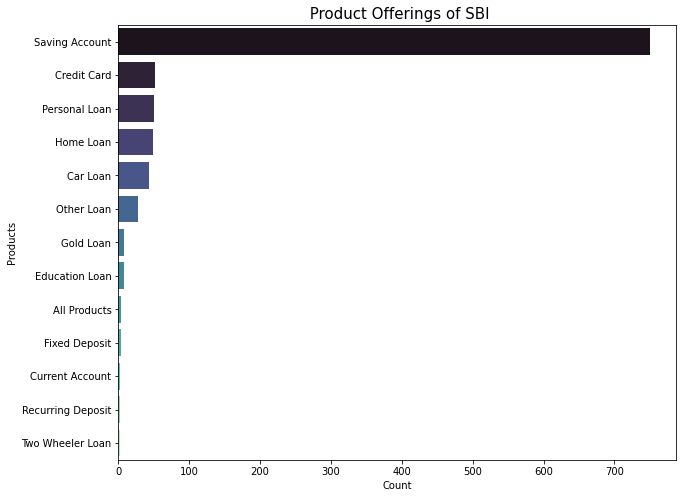

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel("Count")
plt.ylabel("Products")
graph = sns.barplot(x = x_grph, y = y_grph, palette = "mako")
graph.set_title(" Product Offerings of SBI", fontsize = 15)

For SBI, the major product offering is Saving Account that is almost 75% of all its offerings.

In [ ]:
df_sav = df[(df["Title"]=="Saving Account") & (df["Year"] == 2019)]
df_sav.sample(5)

,Title,Heading,Date,Review,Bank,Rating,Year
3949,Saving Account,Excellent,08-05-2019,I hold a savings account with State Bank of In...,State-Bank-Of-India,5.0,2019
160,Saving Account,Good bank,13-07-2019,My salary was opened from HDFC and i am using ...,HDFC-Bank,5.0,2019
4168,Saving Account,Very Good Service,28-01-2019,I am using this Savings account for the last c...,Indian-Bank,4.0,2019
676,Saving Account,Good,03-07-2019,I am holding a savings account in HDFC BANK...,HDFC-Bank,4.0,2019
662,Saving Account,Employee response is good,03-07-2019,My salary account was opened in the year of 20...,HDFC-Bank,5.0,2019


In [ ]:
y_val = df_sav["Bank"].value_counts().index
x_val = df_sav["Bank"].value_counts()
x_grph = []
y_grph = []
for i in range(len(x_val)):
    x_grph.append(x_val[i])
    y_grph.append(y_val[i])

Text(0.5, 1.0, ' Different Banks Offering Saving Account in 2019')

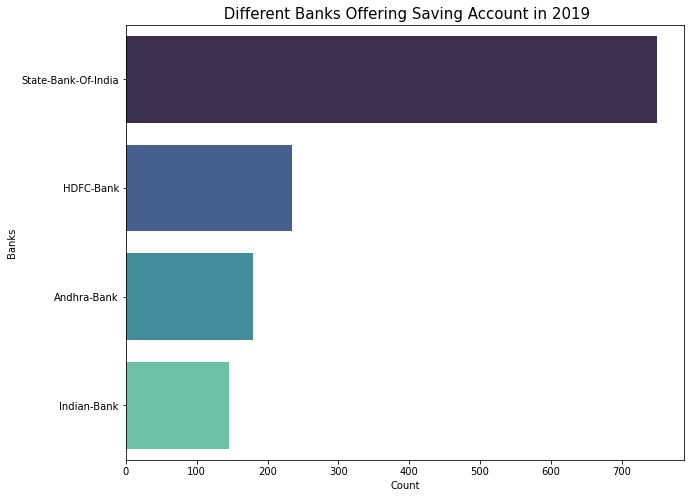

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel("Count")
plt.ylabel("Banks")
graph = sns.barplot(x = x_grph, y = y_grph, palette = "mako")
graph.set_title(" Different Banks Offering Saving Account in 2019", fontsize = 15)

SBI is the market leader in Saving Account having 30% of market share

#### So we found that the two Top Banks are market leaders with their own product offering different from each other. SBI leads with Saving account while HDFC with Credit Cards.

We will analyze why their product is most applicable for the customers in later part of this analysis.

### Lets try to find some answers for question 2

In [ ]:
df_indian = df[df["Bank"]=="Indian-Bank"]
df_indian.tail()

,Title,Heading,Date,Review,Bank,Rating,Year
4995,Saving Account,Savings Account,05-11-2014,I have very good banking experience with them ...,Indian-Bank,4.0,2014
4996,Saving Account,Savings Account,05-11-2014,I have very good banking experience with them ...,Indian-Bank,4.0,2014
4997,Home Loan,Excellent support,03-11-2014,Indian bank services in terms of home loan is ...,Indian-Bank,4.0,2014
4998,Saving Account,Branch services must be improvised,30-10-2014,Indian bank services in terms of savings accou...,Indian-Bank,3.0,2014
4999,Education Loan,Grate service,26-10-2014,There are lot of unknowns when it comes to the...,Indian-Bank,3.5,2014


Lets check the top 3 products for Indian banks since 2014 to present

In [ ]:
def indian(x):
    df_2 = df_indian[df_indian["Year"]==x]
    df_top = df_2.groupby(["Title"])[["Title"]].count()
    df_top = df_top.rename(columns={df_top.columns[0]: "Counts"})
    df_top = df_top.reset_index()
    df_top = df_top.sort_values(["Counts"], ascending = False).head(3)
    #return df_top
    plt.figure(figsize=(6,4))
    plt.xticks(rotation = 90)
    g = sns.barplot("Title", "Counts", data = df_top, palette = "rocket")
    g.set_title(" Product Categories of Indian Bank ", fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


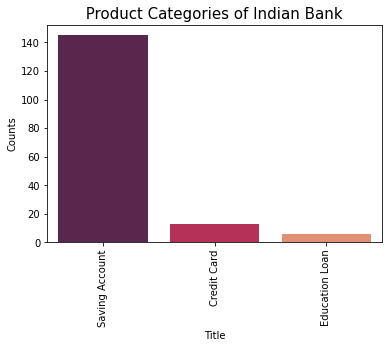

In [ ]:
indian(2019)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


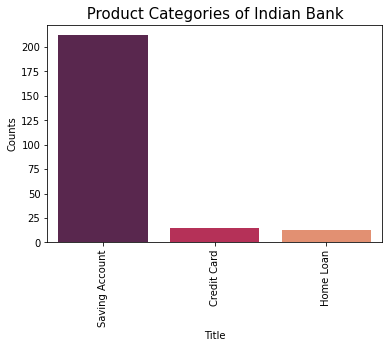

In [ ]:
indian(2018)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


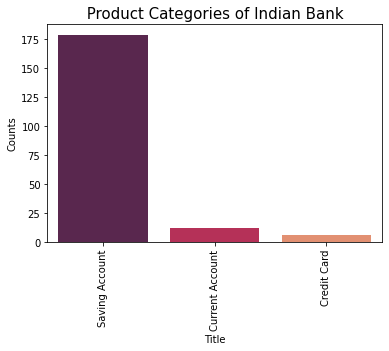

In [ ]:
indian(2017)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


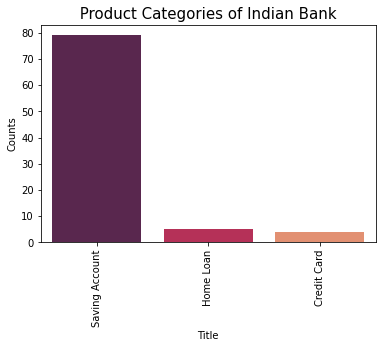

In [ ]:
indian(2016)

Since 2014 Indian bank's primary product offering has been Saving Account yet it is losing its customers to SBI. Lets find out the reason.

In [ ]:
df_sbi_ind = df[((df["Bank"]=="Indian-Bank") | (df["Bank"]=="State-Bank-Of-India")) & (df["Year"]==2019) & (df["Title"]=="Saving Account")]

In [ ]:
rat_1 = df_sbi_ind.groupby("Bank")[["Rating"]].mean().sort_values(by = "Rating", ascending = False)
rat_1

,Rating
Bank,
State-Bank-Of-India,4.104667
Indian-Bank,3.968966


#### So now we have an answer. The average rating in Saving Account for Indian Bank is less than of SBI. We analyze further in later part.

By now, we are already answered the two questions that we raised in the initial part of the analysis.

### We came to see a interesting insight from this analysis i.e, for year 2019 SBI is leading with Savings account while HDFC with Credit Cards. But for none of these two categories, Capital First has its product offerings yet its holding 10% of the market share as of 2019. Lets analyze it.

In [ ]:
df_cap = df[df["Bank"]=="Capital-First"]

In [ ]:
def cap(x):
    df_2 = df_cap[df_cap["Year"]==x]
    df_top = df_2.groupby(["Title"])[["Title"]].count()
    df_top = df_top.rename(columns={df_top.columns[0]: "Counts"})
    df_top = df_top.reset_index()
    df_top = df_top.sort_values(["Counts"], ascending = False)
    #return df_top
    plt.figure(figsize=(6,4))
    plt.xticks(rotation = 90)
    g = sns.barplot("Title", "Counts", data = df_top, palette = "rocket")
    g.set_title(" Product Categories of Capital First", fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


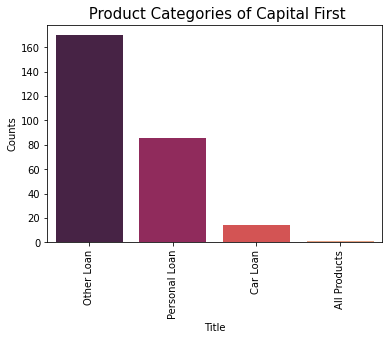

In [ ]:
cap(2019)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


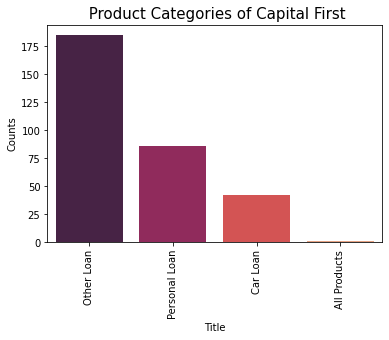

In [ ]:
cap(2018)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


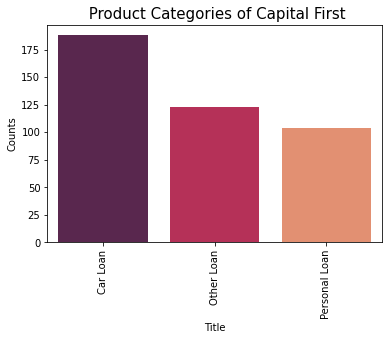

In [ ]:
cap(2017)

Now we see, Capital First major product offering has been Loan since its inception in 2017 when it had the largest market share of 48%. Initially Car Loan has been highest selling product category but with years Other Loan has become its mosttly availed product in the Loan segment.

In [ ]:
rat_2 = df_cap.groupby("Title")[["Rating"]].mean().sort_values(by = "Rating", ascending = False)
rat_2

,Rating
Title,
All Products,4.750000
Other Loan,4.211297
Personal Loan,4.001812
Car Loan,3.686475


1.  All Products may be offered to only a segment of niche customers or they have just launched this as their new product category as a result no of customer offrings is very low and rating is high.
2. Car Loan has pretty average rating as a result no of customers for this product has declined over 2 years.

#### We see Personal Loan is also an important product category which is offered to customers by Banks. Lets derive further insights.

In [ ]:
df_per = df[(df["Title"]=="Personal Loan") & (df["Year"]==2019)]
df_per.head()

,Title,Heading,Date,Review,Bank,Rating,Year
3,Personal Loan,Excellent service,16-07-2019,I have been holding my personal loan from HDFC...,HDFC-Bank,5.0,2019
8,Personal Loan,Excellent,16-07-2019,I have taken a personal loan in HDFC bank for ...,HDFC-Bank,5.0,2019
11,Personal Loan,Better Loan service,16-07-2019,HDFC customer care people are excellent and on...,HDFC-Bank,5.0,2019
23,Personal Loan,Excellent service,16-07-2019,I have been holding my personal loan from HDFC...,HDFC-Bank,5.0,2019
28,Personal Loan,Excellent,16-07-2019,I have taken a personal loan in HDFC bank for ...,HDFC-Bank,5.0,2019


In [ ]:
y_val = df_per["Bank"].value_counts().index
x_val = df_per["Bank"].value_counts()
x_grph = []
y_grph = []
for i in range(len(x_val)):
    x_grph.append(x_val[i])
    y_grph.append(y_val[i])

Text(0.5, 1.0, ' Different Banks Offering Personal Loan in 2019')

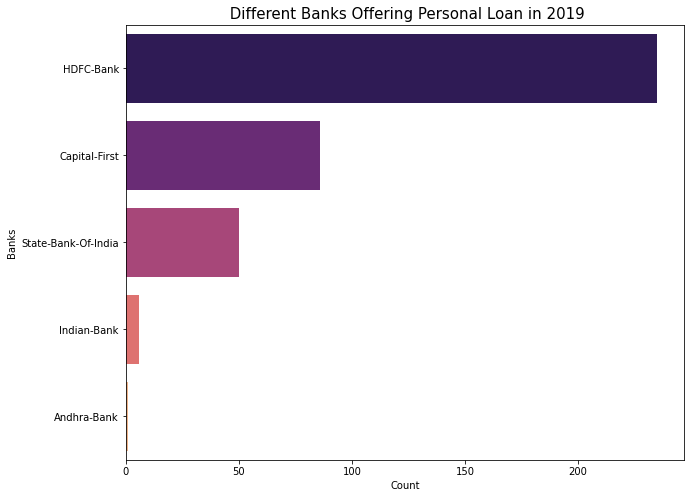

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel("Count")
plt.ylabel("Banks")
graph = sns.barplot(x = x_grph, y = y_grph, palette = "magma")
graph.set_title(" Different Banks Offering Personal Loan in 2019", fontsize = 15)

In [ ]:
rat_3 = df_per.groupby("Bank")[["Rating"]].mean().sort_values(by = "Rating", ascending = False)
rat_3

,Rating
Bank,
Andhra-Bank,5.000000
Indian-Bank,4.916667
State-Bank-Of-India,4.550000
Capital-First,4.197674
HDFC-Bank,3.731915


Andhra Bank has only one record but intereting to see that HDFC bank that has the highest 62.8 % market share in Personal Loan category has the least rating. May be we can try to find out the reason.

#### So as of now, the insights we have derived from the above analysis are:
1. SBI is a market leader in Saving Account
2. HDFC is a market leader in Credit Cards
3. Capital First is holding 10% of market share through its Loan offerings in categories like Other, Personal and Car
4. Indian Bank who started its business offering Saving Acoount to customers has lost out to SBI by 2019 due to inferior rating.
5. HDFC Bank 2nd best product category is Personal Loan inspite of having the least rating with respect to other banks.


## Lets now start working on some Text Analysis and Modelling

In [ ]:
df.head()

,Title,Heading,Reviewer,Date,Review,Bank,Rating
0,Credit Card,Good service,SC,16-07-2019,I am holding an HDFC credit card. I have been ...,HDFC-Bank,4.0
1,Credit Card,Good,AR,16-07-2019,I am holding HDFC bank titanium credit card ...,HDFC-Bank,4.0
2,Credit Card,Good card,SRIDHAR,16-07-2019,I have been using HDFC credit card for long ti...,HDFC-Bank,4.0
3,Personal Loan,Excellent service,U,16-07-2019,I have been holding my personal loan from HDFC...,HDFC-Bank,5.0
4,Saving Account,Excellent service,Q,16-07-2019,I am holding a salary account in HDFC bank for...,HDFC-Bank,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     5000 non-null   object
 1   Heading   5000 non-null   object
 2   Reviewer  4996 non-null   object
 3   Date      5000 non-null   object
 4   Review    5000 non-null   object
 5   Bank      5000 non-null   object
 6   Rating    5000 non-null   object
dtypes: object(7)
memory usage: 273.6+ KB


Here we will treat the rating as Categorical Variable. Hence we convert rating to object datatype

In [ ]:
df["Rating"] = df["Rating"].astype(str)

In [ ]:
df["Rating"].unique()

array(['4.0', '5.0', '2.0', '1.0', '3.0', '0.5', '4.5', '3.5', '2.5',
       '1.5'], dtype=object)

In [ ]:
df_rev = df[["Review", "Rating"]]
df_rev.head()

,Review,Rating
0,I am holding an HDFC credit card. I have been ...,4.0
1,I am holding HDFC bank titanium credit card ...,4.0
2,I have been using HDFC credit card for long ti...,4.0
3,I have been holding my personal loan from HDFC...,5.0
4,I am holding a salary account in HDFC bank for...,5.0


In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
review = df_rev["Review"]

In [ ]:
review_list = []
for i in review:
  review_list.append(i)
review_list

['I am holding an HDFC credit card. I have been using this credit card almost 10 years. I had received the card on time and credit limit is nominal. Sometimes I am getting some benefits like cashback offer and reward points. HDFC bank customer service is great.',
 'I am holding HDFC  bank  titanium credit card for more than 9 months which was applied directly to bank. On time I received a card from bank. It is an annual fee chargeable card.The credit limit is nominal and enhanced it.  I use this card for all purposes but I get less reward point.',
 'I have been using HDFC credit card for long time, they have not charged me annual fee in this card, it is life time free credit card and i am happy with the credit limit they have given me in this card, and there is not much offers they have given in maximum products, they mostly given offers on miles that more important for me , overall service is good.',
 'I have been holding my personal loan from HDFC bank,they have given sufficient loan

In [ ]:
review_text = [re.sub("[^a-zA-Z'0-9.% ]+",' ', x) for x in review_list]
review_text[0]

'I am holding an HDFC credit card. I have been using this credit card almost 10 years. I had received the card on time and credit limit is nominal. Sometimes I am getting some benefits like cashback offer and reward points. HDFC bank customer service is great.'

In [ ]:
join_text_review = " ".join(review_text)

In [ ]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [ ]:
word = re.findall("\w+",join_text_review)
word[0:10]

['I', 'am', 'holding', 'an', 'HDFC', 'credit', 'card', 'I', 'have', 'been']

In [ ]:
no_stopwords = [x for x in word if x not in STOPWORDS]

In [ ]:
wc = WordCloud(width = 1000, height = 800, stopwords = STOPWORDS)

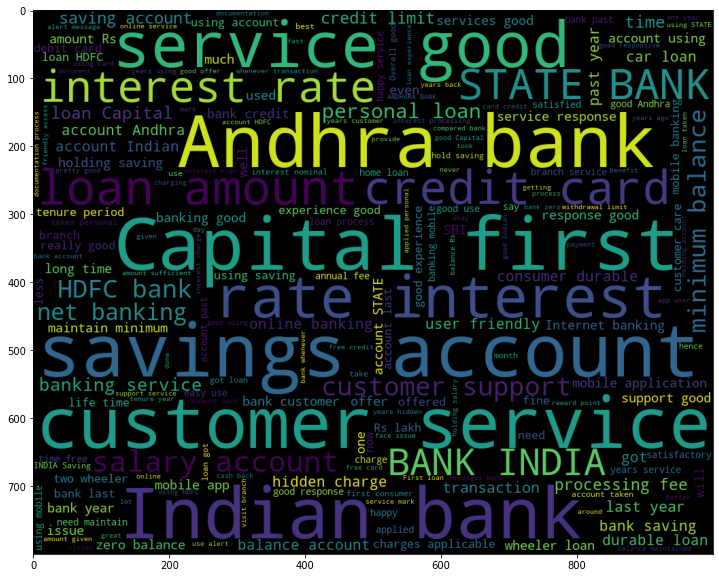

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(join_text_review))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
tfidf = TfidfVectorizer(stop_words = STOPWORDS, lowercase= False, ngram_range = (1,3), token_pattern = "[A-za-z]+",max_features = 200, max_df = 0.7, min_df = 10)

In [ ]:
X = tfidf.fit_transform(review_text)
y = df_rev['Rating'] 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
X

<5000x200 sparse matrix of type '<class 'numpy.float64'>'
	with 104286 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0 )

In [ ]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=100)
LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.5       0.00      0.00      0.00         2
         1.0       0.40      0.05      0.10        37
         2.0       0.22      0.04      0.07        50
         2.5       0.00      0.00      0.00         5
         3.0       0.40      0.25      0.31       143
         3.5       0.00      0.00      0.00        20
         4.0       0.31      0.20      0.24       281
         4.5       0.00      0.00      0.00        37
         5.0       0.48      0.81      0.60       425

    accuracy                           0.44      1000
   macro avg       0.20      0.15      0.15      1000
weighted avg       0.37      0.44      0.38      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
forest = RandomForestClassifier(n_estimators = 500, max_depth = None, min_samples_split=2, min_samples_leaf =1,bootstrap = True, random_state=0)
forest = forest.fit(X_train, y_train)

In [ ]:
y_pred_forest  = forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.5       0.00      0.00      0.00         2
         1.0       0.80      0.11      0.19        37
         2.0       0.44      0.08      0.14        50
         2.5       0.00      0.00      0.00         5
         3.0       0.44      0.22      0.30       143
         3.5       0.00      0.00      0.00        20
         4.0       0.35      0.22      0.27       281
         4.5       0.67      0.11      0.19        37
         5.0       0.49      0.84      0.62       425

    accuracy                           0.46      1000
   macro avg       0.35      0.18      0.19      1000
weighted avg       0.45      0.46      0.40      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*   From Logistic Regression, accuracy is 44%
*   From Random Forest,  accuracy is 46%



Since there are records whose ratings are 0.5, 1.5,2.5,3.5,4.5 which might affect the accuracy of the model, Lets create a threshold value for given ranges and again check the model.

Poor: <2

Avergae: 2<=x<4

Good: >4


In [ ]:
def thresh(c):
  if (c>=4.0):
        a="Good"
  elif ((c>=2) & (c<4)):
        a="Average"
  else:
        a="Poor"
  return a

In [ ]:
df_rev["Rating"] = df_rev["Rating"].astype(float)
df_rev["Label"] = df_rev["Rating"].apply(lambda x: thresh(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_rev.head()

,Review,Rating,Label
0,I am holding an HDFC credit card. I have been ...,4.0,Good
1,I am holding HDFC bank titanium credit card ...,4.0,Good
2,I have been using HDFC credit card for long ti...,4.0,Good
3,I have been holding my personal loan from HDFC...,5.0,Good
4,I am holding a salary account in HDFC bank for...,5.0,Good


In [ ]:
X = tfidf.fit_transform(review_text)
y = df_rev["Label"] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0 )

In [ ]:
forest_1 = RandomForestClassifier(n_estimators = 500, max_depth = None, min_samples_split=2, min_samples_leaf =1,bootstrap = True, random_state=0)
forest_1 = forest_1.fit(X_train, y_train)

In [ ]:
y_pred_forest  = forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.52      0.23      0.32       218
        Good       0.78      0.95      0.86       743
        Poor       0.00      0.00      0.00        39

    accuracy                           0.76      1000
   macro avg       0.43      0.39      0.39      1000
weighted avg       0.69      0.76      0.71      1000



Now we can see after labelling the Rating value for certain range, the accuracy score shot up to 76% much desired than earlier.

Lets predict some Review

In [ ]:
new = "I am a customer of HDFC bank and is satified with the service"
new = tfidf.transform([new])
forest.predict(new)

array(['Good'], dtype=object)

Future Scope: We can further improvise our model, implement cross validation, work with "Heading" feature.

Sources: 
1. Class Lectures
2. https://www.kaggle.com/viroviro/sentiment-analysis-tf-idf-logistic-regression
3. Few codes are reshared from my old projects (https://github.com/Avirup96/Projects/blob/main/Spotify_song_prediction.ipynb)
